# Simple EDA with Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.options.mode.chained_assignment = None 

In [2]:
#Import Data
df_as = pd.read_csv("Data/2021/core/AllstarFull.csv") #All Stars
df_bat = pd.read_csv("Data/2021/core/Batting.csv") #batting (reg season)
df_postbat = pd.read_csv("Data/2021/core/BattingPost.csv") #batting (postseason)
df_field = pd.read_csv("Data/2021/core/Fielding.csv") #fielding
df_pitch = pd.read_csv("Data/2021/core/Pitching.csv") #pitching
df_postpitch = pd.read_csv("Data/2021/core/PitchingPost.csv") #Postseason Pitching
df_sal = pd.read_csv("Data/2021/contrib/Salaries.csv") #salaries
df_people = pd.read_csv("Data/2021/core/People.csv") #player names

In [3]:
df_as['yearID'].describe() #2021 data added.

count    5454.000000
mean     1979.249908
std        25.202333
min      1933.000000
25%      1959.000000
50%      1979.000000
75%      2002.000000
max      2021.000000
Name: yearID, dtype: float64

In [4]:
#Check out Dimensions of the dataframes.
dfs = [df_as, df_bat, df_postbat, df_field, df_pitch, df_postpitch, df_sal, df_people]

for df in dfs:
    print(df.shape)
    
#biggest one: df_bat & df_field

(5454, 8)
(110495, 22)
(15879, 22)
(147080, 18)
(49430, 30)
(6308, 30)
(26428, 5)
(20370, 24)


In [5]:
#Look at some sample columns
for df in [df_bat, df_field, df_sal]:
    print (df.columns)

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')
Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'POS', 'G', 'GS',
       'InnOuts', 'PO', 'A', 'E', 'DP', 'PB', 'WP', 'SB', 'CS', 'ZR'],
      dtype='object')
Index(['yearID', 'teamID', 'lgID', 'playerID', 'salary'], dtype='object')


In [6]:
# To look at only the last decade of data
# create a function to filter for the last decade of data (max year is 2020)
def decadeonly(mydf):
    mydf = mydf[mydf['yearID']>=2010]
    return mydf

### Functions to Calculate Additional Stats

#### BA (Batting Average)

In [7]:
def batting_average(df):
    H = df['H']
    AB = df['AB']
    BA = H/AB
    return round(BA,3) #retain 3 decimal places


#### OBP (On Base Percentage)

In [8]:
#OBP = (Hits + Walks + Hit by Pitch) / (At Bats + Walks + Hit by Pitch + Sacrifice Flies).
def obp(df):
    H = df['H']
    W = df['BB']
    HBP = df['HBP']
    AB = df['AB']
    SF = df['SF']
    OBP = (H+W+HBP)/(AB+W+HBP+SF)
    return round(OBP,3)

#### SLG (Slugging)

In [9]:
#SLG = Total Bases ÷ At Bats
#Total Bases = Singles + (2 x Doubles) + (3 x Triples) + (4 x Home Runs)
#Total Bases (alternate method) = Hits + Doubles + (2 x Triples) + (3 x Home Runs)[1]
def slg(df):
    total_bases = df['H'] + df['2B'] + 2*df['3B'] + 3*df['HR']
    AB = df['AB']
    SLG = total_bases/AB
    return round(SLG,3)

# Analysis 1: Evaluation of MLB All Stars (since 2010)

In [10]:
df_AS = decadeonly(df_as)

#### Get the all stars' regular season stats at the END of the season (overall evaluation)

In [11]:
df_BAT = decadeonly(df_bat)

#### AS Hitters

In [12]:
df_AS_bat = df_AS.merge(df_BAT, on=['playerID','yearID'], how='inner') #889 players

#### AS Pitchers

In [13]:
df_AS_pit = df_AS.merge(df_pitch, on=['playerID','yearID'], how='inner') #370 players

### Calculate Additional Metrics

In [14]:
#Batting Average
df_AS_bat['BA'] = batting_average(df_AS_bat)

In [15]:
#OBP
df_AS_bat['OBP'] = obp(df_AS_bat)

In [16]:
#SLG
df_AS_bat['SLG'] = slg(df_AS_bat)

In [17]:
#OPS = OBP + SLG
df_AS_bat['OPS'] = df_AS_bat['OBP'] + df_AS_bat['SLG']

In [29]:
#Calculate for the entire batting dataset (df_bat) as well
df_bat['BA'] = batting_average(df_bat)
df_bat['OBP'] = obp(df_bat)
df_bat['SLG'] = slg(df_bat)
df_bat['OPS'] = df_bat['OBP'] + df_bat['SLG']

#### 1a) AS Hitters' Stats (50 AB minimum & in 2021) - exclude pitchers

In [33]:
#only look at players (excluding pitchers) with < 50 AB (estimate) & in most recent year
df_AS_bat_21 = df_AS_bat[(df_AS_bat['AB']>50) & (df_AS_bat['yearID']==2021) & (df_AS_bat['startingPos']!=1)] 

In [25]:
df_AS_bat_21.columns

Index(['playerID', 'yearID', 'gameNum', 'gameID', 'teamID_x', 'lgID_x', 'GP',
       'startingPos', 'stint', 'teamID_y', 'lgID_y', 'G', 'AB', 'R', 'H', '2B',
       '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF',
       'GIDP', 'BA', 'OBP', 'SLG', 'OPS'],
      dtype='object')

In [34]:
#Summary of some common stats
df_AS_bat_21[['G','AB','R','H','2B','3B','HR','RBI','BB','SO','HBP','BA','OBP','SLG','OPS']].describe()
#Average: 20+ HR , 110+ H, <100 SO

,G,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,BA,OBP,SLG,OPS
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,113.156250,412.109375,69.312500,113.921875,22.546875,1.781250,21.593750,64.968750,45.203125,95.906250,4.796875,0.263422,0.336563,0.466219,0.802781
std,45.892289,188.310797,35.026011,55.852500,11.969445,2.042942,13.440898,35.282069,27.629165,43.911064,3.451154,0.051663,0.066681,0.117670,0.178585
min,28.000000,52.000000,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000,0.000000,0.094000,0.111000,0.115000,0.243000
25%,79.500000,288.250000,43.500000,69.750000,12.750000,0.000000,10.750000,44.250000,27.750000,63.000000,2.000000,0.254750,0.316750,0.441250,0.781000
50%,132.000000,477.000000,77.000000,129.000000,25.000000,1.000000,23.500000,68.500000,41.000000,94.500000,4.000000,0.272000,0.348000,0.491500,0.852500
75%,151.250000,560.250000,94.250000,157.250000,32.000000,3.000000,31.000000,97.250000,62.250000,125.000000,7.000000,0.295250,0.370250,0.537250,0.895250
max,162.000000,664.000000,123.000000,191.000000,42.000000,8.000000,48.000000,121.000000,145.000000,194.000000,13.000000,0.338000,0.466000,0.624000,1.090000


In [52]:
#compare it against the entire league averages (Year 2021 & 100 AB minimum)
df_bat[(df_bat['AB']>=100) & (df_bat['yearID']==2021)][['G','AB','R','H','2B','3B','HR','RBI','BB','SO','HBP','BA','OBP','SLG','OPS']].describe()
#Average: 12HR, lower BA, H, etc. 

,G,AB,R,H,2B,3B,HR,RBI,BB,SO,HBP,BA,OBP,SLG,OPS
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,96.872068,315.379531,44.078891,79.168443,15.782516,1.341151,12.132196,42.473348,31.430704,78.571429,4.117271,0.243768,0.316580,0.409367,0.725947
std,37.715657,151.044472,26.436429,43.628915,9.544522,1.541045,9.818851,26.491610,20.534055,38.829753,3.968506,0.036486,0.040502,0.077260,0.108230
min,32.000000,100.000000,6.000000,16.000000,0.000000,0.000000,0.000000,5.000000,3.000000,12.000000,0.000000,0.141000,0.207000,0.208000,0.424000
25%,64.000000,188.000000,22.000000,43.000000,8.000000,0.000000,5.000000,21.000000,16.000000,47.000000,1.000000,0.220000,0.291000,0.356000,0.654000
50%,95.000000,284.000000,37.000000,69.000000,13.000000,1.000000,9.000000,36.000000,27.000000,72.000000,3.000000,0.247000,0.317000,0.404000,0.723000
75%,131.000000,450.000000,61.000000,112.000000,23.000000,2.000000,17.000000,57.000000,43.000000,104.000000,6.000000,0.268000,0.344000,0.458000,0.788000
max,162.000000,664.000000,123.000000,191.000000,42.000000,8.000000,48.000000,121.000000,145.000000,202.000000,27.000000,0.342000,0.466000,0.647000,1.090000


#### 1b) AS Pitchers' Stats (in 2021)

### The Great Ones since 2010: Top 10 Repeat All Stars

In [20]:
repeat_allstars = df_AS.merge(df_people[['playerID','nameFirst','nameLast']], on='playerID', how='left').groupby(['playerID','nameFirst','nameLast'])['playerID'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
repeat_allstars

,playerID,nameFirst,nameLast,count
265,molinya01,Yadier,Molina,9
401,troutmi01,Mike,Trout,9
362,scherma01,Max,Scherzer,8
212,kershcl01,Clayton,Kershaw,8
215,kimbrcr01,Craig,Kimbrel,8
7,altuvjo01,Jose,Altuve,7
351,salech01,Chris,Sale,7
310,poseybu01,Buster,Posey,7
63,cabremi01,Miguel,Cabrera,7
301,perezsa02,Salvador,Perez,7


In [21]:
#concatenate first and last name columns
repeat_allstars['playerName'] = repeat_allstars['nameFirst'] + " " + repeat_allstars['nameLast']

[Text(0, 0, 'Yadier Molina'),
 Text(0, 0, 'Mike Trout'),
 Text(0, 0, 'Max Scherzer'),
 Text(0, 0, 'Clayton Kershaw'),
 Text(0, 0, 'Craig Kimbrel'),
 Text(0, 0, 'Jose Altuve'),
 Text(0, 0, 'Chris Sale'),
 Text(0, 0, 'Buster Posey'),
 Text(0, 0, 'Miguel Cabrera'),
 Text(0, 0, 'Salvador Perez')]

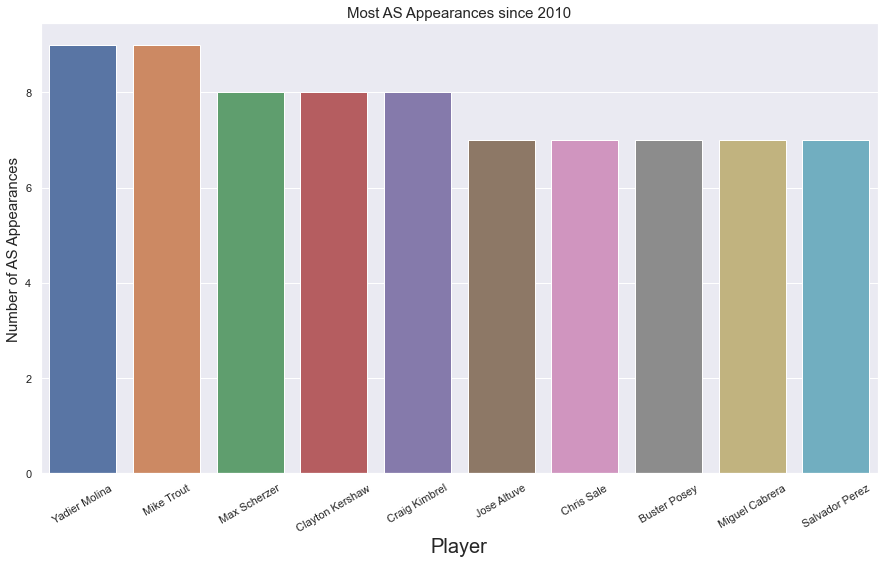

In [22]:
sns.set_theme(style='whitegrid')
tips = sns.load_dataset("tips")
sns.set(rc={'figure.figsize':(15,8.27)})
p = sns.barplot(x="playerName", y="count", data=repeat_allstars)
p.set_xlabel("Player", fontsize = 20)
p.set_ylabel("Number of AS Appearances", fontsize = 15)
p.set_title("Most AS Appearances since 2010", fontsize = 15)
p.set_xticklabels(p.get_xticklabels(),rotation=30)

###